# 1. 1D Laplace equation:

Compiling model...
Building feed-forward neural network...
'build' took 0.087714 s

'compile' took 0.362246 s

Training model...

Step      Train loss              Test loss               Test metric   
0         [4.37e+01, 1.37e-02]    [4.95e+01, 1.37e-02]    [1.08e+00]    
1000      [1.99e-04, 7.45e-08]    [3.54e-04, 7.45e-08]    [2.74e-04]    
2000      [6.58e-04, 1.84e-05]    [7.76e-04, 1.84e-05]    [3.67e-03]    
3000      [9.23e-04, 2.34e-05]    [9.86e-04, 2.34e-05]    [4.30e-03]    
4000      [5.54e-05, 1.21e-06]    [1.13e-04, 1.21e-06]    [8.71e-04]    
5000      [1.39e-03, 9.53e-05]    [9.58e-04, 9.53e-05]    [8.01e-03]    
6000      [2.35e-03, 2.05e-05]    [2.24e-03, 2.05e-05]    [5.75e-03]    
7000      [7.70e-04, 2.55e-05]    [5.96e-04, 2.55e-05]    [3.45e-03]    
8000      [6.17e-06, 7.46e-09]    [6.37e-05, 7.46e-09]    [8.37e-05]    
9000      [9.42e-06, 1.19e-07]    [6.88e-05, 1.19e-07]    [2.50e-04]    
10000     [6.16e-06, 6.72e-08]    [6.13e-05, 6.72e-08]    [2.61e-04

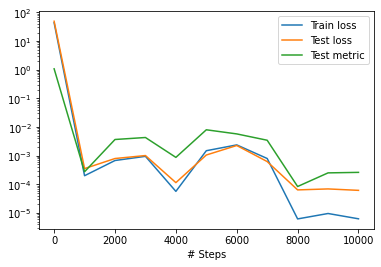

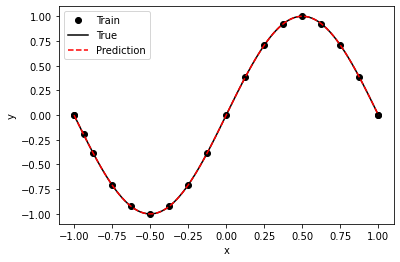

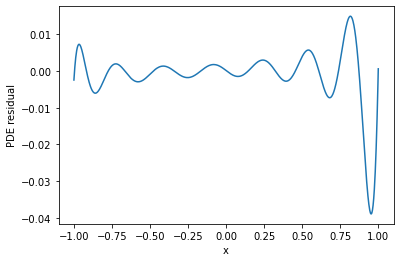

In [2]:
import deepxde as dde
import matplotlib.pyplot as plt
import numpy as np
# Import tf if using backend tensorflow.compat.v1 or tensorflow
from deepxde.backend import tf
## Import torch if using backend pytorch
#import torch


def pde(x, y):
    dy_xx = dde.grad.hessian(y, x)
    # Use tf.sin for backend tensorflow.compat.v1 or tensorflow
    return -dy_xx - np.pi ** 2 * tf.sin(np.pi * x)
    # Use torch.sin for backend pytorch
    # return -dy_xx - np.pi ** 2 * torch.sin(np.pi * x)
    # Use paddle.sin for backend paddle
    # return -dy_xx - np.pi ** 2 * paddle.sin(np.pi * x)


def boundary(x, _):
    return np.isclose(x[0], -1) or np.isclose(x[0], 1)

# def boundary(x, _):
#     return dde.utils.isclose(x[0], -1) or dde.utils.isclose(x[0], 1)

def func(x):
    return np.sin(np.pi * x)


geom = dde.geometry.Interval(-1, 1)
bc = dde.icbc.DirichletBC(geom, func, boundary)
data = dde.data.PDE(geom, pde, bc, 16, 2, solution=func, num_test=100)

layer_size = [1] + [50] * 3 + [1]
activation = "tanh"
initializer = "Glorot uniform"
net = dde.nn.FNN(layer_size, activation, initializer)

model = dde.Model(data, net)
model.compile("adam", lr=0.001, metrics=["l2 relative error"])

losshistory, train_state = model.train(iterations=10000)
# Optional: Save the model during training.
# checkpointer = dde.callbacks.ModelCheckpoint(
#     "model/model", verbose=1, save_better_only=True
# )
# Optional: Save the movie of the network solution during training.
# ImageMagick (https://imagemagick.org/) is required to generate the movie.
# movie = dde.callbacks.MovieDumper(
#     "model/movie", [-1], [1], period=100, save_spectrum=True, y_reference=func
# )
# losshistory, train_state = model.train(iterations=10000, callbacks=[checkpointer, movie])

dde.saveplot(losshistory, train_state, issave=True, isplot=True)

# Optional: Restore the saved model with the smallest training loss
# model.restore(f"model/model-{train_state.best_step}.ckpt", verbose=1)
# Plot PDE residual
x = geom.uniform_points(1000, True)
y = model.predict(x, operator=pde)
plt.figure()
plt.plot(x, y)
plt.xlabel("x")
plt.ylabel("PDE residual")
plt.show()

# 2. 1+1D Diffsion equation

Compiling model...
Building feed-forward neural network...
'build' took 0.036875 s

'compile' took 0.321640 s

Training model...

Step      Train loss                        Test loss                         Test metric   
0         [1.66e+01, 9.94e-02, 6.54e-01]    [1.76e+01, 9.94e-02, 6.54e-01]    [1.35e+00]    
1000      [4.84e-03, 3.89e-03, 3.92e-04]    [7.30e-03, 3.89e-03, 3.92e-04]    [8.33e-02]    
2000      [6.85e-04, 2.40e-04, 1.59e-04]    [1.53e-03, 2.40e-04, 1.59e-04]    [2.12e-02]    
3000      [1.37e-03, 9.58e-05, 3.22e-05]    [1.52e-03, 9.58e-05, 3.22e-05]    [1.24e-02]    
4000      [1.86e-04, 9.50e-06, 1.29e-05]    [4.62e-04, 9.50e-06, 1.29e-05]    [4.13e-03]    
5000      [3.06e-03, 1.85e-04, 5.60e-05]    [2.07e-03, 1.85e-04, 5.60e-05]    [1.58e-02]    
6000      [6.05e-05, 5.15e-06, 8.36e-06]    [1.69e-04, 5.15e-06, 8.36e-06]    [3.08e-03]    
7000      [3.73e-05, 3.81e-06, 6.50e-06]    [1.19e-04, 3.81e-06, 6.50e-06]    [3.15e-03]    
8000      [7.63e-05, 7.48e-06, 5.

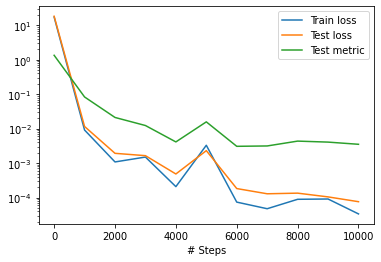

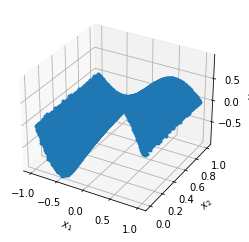

In [3]:
"""Backend supported: tensorflow.compat.v1, tensorflow, pytorch, paddle"""
import deepxde as dde
import numpy as np
# Backend tensorflow.compat.v1 or tensorflow
from deepxde.backend import tf
# Backend pytorch
# import torch
# Backend paddle
# import paddle

# @tf.function
def pde(x, y):
    dy_t = dde.grad.jacobian(y, x, j=1)
    #dy_xx = dde.grad.hessian(y, x, i=0, j=0)
    #dy_t = tf.gradients(y, x)[0][:, 1:2]
    dy_xx = dde.grad.hessian(y, x, i=0, j=0)
#     dy_x = tf.gradients(y, x)[0][:, 0:1]
#     dy_xx = tf.gradients(dy_x, x)[0][:, 0:1]
    
    # Backend tensorflow.compat.v1 or tensorflow
    return (
        dy_t
        - dy_xx
        + tf.exp(-x[:, 1:])
        * (tf.sin(np.pi * x[:, 0:1]) - np.pi ** 2 * tf.sin(np.pi * x[:, 0:1]))
    )
    # Backend pytorch
    # return (
    #     dy_t
    #     - dy_xx
    #     + torch.exp(-x[:, 1:])
    #     * (torch.sin(np.pi * x[:, 0:1]) - np.pi ** 2 * torch.sin(np.pi * x[:, 0:1]))
    # )
    

def func(x):
    return np.sin(np.pi * x[:, 0:1]) * np.exp(-x[:, 1:])


geom = dde.geometry.Interval(-1, 1)
timedomain = dde.geometry.TimeDomain(0, 1)
geomtime = dde.geometry.GeometryXTime(geom, timedomain)

bc = dde.icbc.DirichletBC(geomtime, func, lambda _, on_boundary: on_boundary)
ic = dde.icbc.IC(geomtime, func, lambda _, on_initial: on_initial)
data = dde.data.TimePDE(
    geomtime,
    pde,
    [bc, ic],
    num_domain=40,
    num_boundary=20,
    num_initial=10,
    solution=func,
    num_test=10000,
)

layer_size = [2] + [32] * 3 + [1]
activation = "tanh"
initializer = "Glorot uniform"
net = dde.nn.FNN(layer_size, activation, initializer)

model = dde.Model(data, net)

model.compile("adam", lr=0.001, metrics=["l2 relative error"])
losshistory, train_state = model.train(iterations=10000)

dde.saveplot(losshistory, train_state, issave=True, isplot=True)

# 3. 2D Laplace equation on L-shape domain

In [4]:
import deepxde as dde


def pde(x, u):
    dy_xx = dde.grad.hessian(u, x, i=0, j=0)
    dy_yy = dde.grad.hessian(u, x, i=1, j=1)    
    return -dy_xx - dy_yy - 1


def boundary(_, on_boundary):
    return on_boundary


geom = dde.geometry.Polygon([[0, 0], [1, 0], [1, -1], [-1, -1], [-1, 1], [0, 1]])
bc = dde.icbc.DirichletBC(geom, lambda x: 0, boundary)

data = dde.data.PDE(geom, pde, bc, num_domain=1200, num_boundary=120, num_test=1500)
net = dde.nn.FNN([2] + [50] * 4 + [1], "tanh", "Glorot uniform")
model = dde.Model(data, net)

model.compile("adam", lr=0.001)
model.train(iterations=50000)
model.compile("L-BFGS")
losshistory, train_state = model.train()
dde.saveplot(losshistory, train_state, issave=True, isplot=True)

Compiling model...
Building feed-forward neural network...
'build' took 0.051259 s

'compile' took 0.437524 s

Training model...

Step      Train loss              Test loss               Test metric
0         [1.08e+00, 2.66e-02]    [1.09e+00, 2.66e-02]    []  
1000      [1.78e-04, 2.81e-03]    [1.67e-04, 2.81e-03]    []  
2000      [1.45e-04, 2.55e-03]    [1.24e-04, 2.55e-03]    []  
3000      [1.83e-04, 2.01e-03]    [1.35e-04, 2.01e-03]    []  
4000      [2.93e-04, 1.22e-03]    [2.54e-04, 1.22e-03]    []  
5000      [2.11e-04, 6.25e-04]    [1.85e-04, 6.25e-04]    []  
6000      [1.46e-04, 4.10e-04]    [1.18e-04, 4.10e-04]    []  
7000      [6.31e-05, 2.47e-04]    [4.99e-05, 2.47e-04]    []  
8000      [4.77e-05, 2.07e-04]    [4.36e-05, 2.07e-04]    []  
9000      [4.09e-05, 1.73e-04]    [3.98e-05, 1.73e-04]    []  
10000     [3.58e-05, 1.60e-04]    [3.67e-05, 1.60e-04]    []  
11000     [1.11e-04, 1.70e-04]    [1.10e-04, 1.70e-04]    []  
12000     [5.99e-05, 1.58e-04]    [5.19e-05,

KeyboardInterrupt: 

# 4. Inverse problem for diffusion equation

Compiling model...
Building feed-forward neural network...
'build' took 0.040860 s

'compile' took 0.401192 s

Training model...

0         [1.48e+01, 2.21e-01, 8.10e-01, 2.82e-01][1.71e+01, 2.21e-01, 8.10e-01, 2.82e-01][1.46e+00]
0 [1.10e+00]
1000      [3.07e-03, 4.53e-03, 5.26e-03, 2.64e-03][3.84e-03, 4.53e-03, 5.26e-03, 2.64e-03][1.39e-01]
1000 [1.20e+00]
2000      [7.11e-04, 4.51e-04, 6.79e-04, 4.47e-04][1.77e-03, 4.51e-04, 6.79e-04, 4.47e-04][7.94e-02]
2000 [1.09e+00]
3000      [3.00e-04, 3.81e-05, 6.62e-05, 5.82e-05][1.05e-03, 3.81e-05, 6.62e-05, 5.82e-05][3.17e-02]
3000 [1.04e+00]
4000      [1.53e-04, 1.99e-05, 7.72e-06, 1.02e-05][7.09e-04, 1.99e-05, 7.72e-06, 1.02e-05][1.30e-02]
4000 [1.01e+00]
5000      [1.41e-03, 1.48e-04, 6.91e-05, 5.55e-05][1.41e-03, 1.48e-04, 6.91e-05, 5.55e-05][1.72e-02]
5000 [1.01e+00]
6000      [7.46e-05, 1.54e-05, 2.19e-06, 4.27e-06][4.28e-04, 1.54e-05, 2.19e-06, 4.27e-06][7.12e-03]
6000 [1.01e+00]
7000      [6.66e-05, 1.36e-05, 9.91e-07, 5.03e-06][3.6

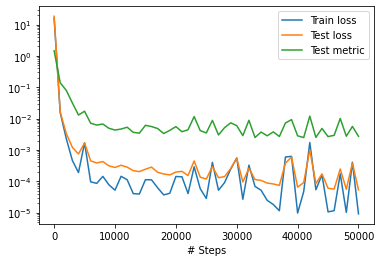

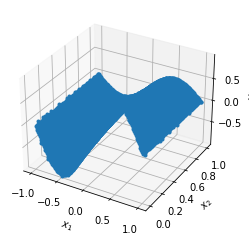

In [5]:
"""Backend supported: tensorflow.compat.v1, tensorflow, pytorch, paddle"""
import deepxde as dde
import numpy as np
# Backend tensorflow.compat.v1 or tensorflow
from deepxde.backend import tf
# Backend pytorch
# import torch
# Backend paddle
# import paddle


C = dde.Variable(1.1)


def pde(x, y):
    dy_t = dde.grad.jacobian(y, x, i=0, j=1)
    dy_xx = dde.grad.hessian(y, x, i=0, j=0)
    # Backend tensorflow.compat.v1 or tensorflow
    return (
        dy_t
        - C * dy_xx
        + tf.exp(-x[:, 1:])
        * (tf.sin(np.pi * x[:, 0:1]) - np.pi ** 2 * tf.sin(np.pi * x[:, 0:1]))
    )
    # Backend pytorch
    # return (
    #     dy_t
    #     - C * dy_xx
    #     + torch.exp(-x[:, 1:])
    #     * (torch.sin(np.pi * x[:, 0:1]) - np.pi ** 2 * torch.sin(np.pi * x[:, 0:1]))
    # )
   
def func(x):
    return np.sin(np.pi * x[:, 0:1]) * np.exp(-x[:, 1:])


geom = dde.geometry.Interval(-1, 1)
timedomain = dde.geometry.TimeDomain(0, 1)
geomtime = dde.geometry.GeometryXTime(geom, timedomain)

bc = dde.icbc.DirichletBC(geomtime, func, lambda _, on_boundary: on_boundary)
ic = dde.icbc.IC(geomtime, func, lambda _, on_initial: on_initial)

observe_x = np.vstack((np.linspace(-1, 1, num=10), np.full((10), 1))).T
observe_y = dde.icbc.PointSetBC(observe_x, func(observe_x), component=0)

data = dde.data.TimePDE(
    geomtime,
    pde,
    [bc, ic, observe_y],
    num_domain=40,
    num_boundary=20,
    num_initial=10,
    anchors=observe_x,
    solution=func,
    num_test=10000,
)

layer_size = [2] + [32] * 3 + [1]
activation = "tanh"
initializer = "Glorot uniform"
net = dde.nn.FNN(layer_size, activation, initializer)

model = dde.Model(data, net)

model.compile(
    "adam", lr=0.001, metrics=["l2 relative error"], external_trainable_variables=C
)
variable = dde.callbacks.VariableValue(C, period=1000)
losshistory, train_state = model.train(iterations=50000, callbacks=[variable])

dde.saveplot(losshistory, train_state, issave=True, isplot=True)

# DeepONet for aligned data

Compiling model...
Building DeepONetCartesianProd...
'build' took 0.049778 s

'compile' took 0.350522 s

Training model...

Step      Train loss    Test loss     Test metric   
0         [2.06e-01]    [1.96e-01]    [8.65e-01]    
1000      [4.80e-05]    [6.87e-05]    [3.19e-02]    
2000      [1.81e-05]    [3.11e-05]    [2.18e-02]    
3000      [1.56e-05]    [2.54e-05]    [1.91e-02]    
4000      [8.68e-06]    [1.79e-05]    [1.65e-02]    
5000      [7.15e-06]    [1.57e-05]    [1.55e-02]    
6000      [1.01e-05]    [1.75e-05]    [1.56e-02]    
7000      [5.30e-06]    [1.22e-05]    [1.36e-02]    
8000      [4.67e-06]    [1.11e-05]    [1.29e-02]    
9000      [4.25e-06]    [1.01e-05]    [1.22e-02]    
10000     [3.74e-06]    [9.20e-06]    [1.16e-02]    

Best model at step 10000:
  train loss: 3.74e-06
  test loss: 9.20e-06
  test metric: [1.16e-02]

'train' took 6.719405 s



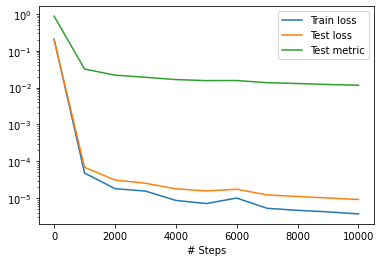

In [37]:
import deepxde as dde
import matplotlib.pyplot as plt
import numpy as np

# Load dataset
d = np.load("antiderivative_aligned_train.npz", allow_pickle=True)
X_train = (d["X"][0].astype(np.float32), d["X"][1].astype(np.float32))
y_train = d["y"].astype(np.float32)
d = np.load("antiderivative_aligned_test.npz", allow_pickle=True)
X_test = (d["X"][0].astype(np.float32), d["X"][1].astype(np.float32))
y_test = d["y"].astype(np.float32)

data = dde.data.TripleCartesianProd(
    X_train=X_train, y_train=y_train, X_test=X_test, y_test=y_test
)

# Choose a network
m = 100
dim_x = 1
net = dde.nn.DeepONetCartesianProd(
    [m, 40, 40],
    [dim_x, 40, 40],
    "relu",
    "Glorot normal",
)

# Define a Model
model = dde.Model(data, net)

# Compile and Train
model.compile("adam", lr=0.001, metrics=["mean l2 relative error"])
losshistory, train_state = model.train(iterations=10000)

# Plot the loss trajectory
dde.utils.plot_loss_history(losshistory)
plt.show()

# DeepoNet Unaligned data

Compiling model...
Building DeepONet...
'build' took 0.042359 s

'compile' took 0.361604 s

Training model...

Step      Train loss    Test loss     Test metric
0         [2.73e-01]    [2.81e-01]    []  
1000      [6.62e-04]    [7.46e-04]    []  
2000      [2.99e-04]    [3.29e-04]    []  
3000      [2.08e-04]    [2.32e-04]    []  
4000      [1.52e-04]    [1.72e-04]    []  
5000      [1.06e-04]    [1.22e-04]    []  
6000      [7.18e-05]    [8.16e-05]    []  
7000      [6.40e-05]    [7.35e-05]    []  
8000      [4.53e-05]    [5.37e-05]    []  
9000      [3.86e-05]    [4.53e-05]    []  
10000     [3.35e-05]    [3.94e-05]    []  

Best model at step 10000:
  train loss: 3.35e-05
  test loss: 3.94e-05
  test metric: []

'train' took 45.000159 s



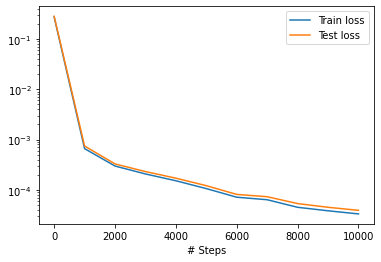

In [38]:
""""Backend supported: tensorflow.compat.v1"""
import deepxde as dde
import matplotlib.pyplot as plt
import numpy as np

# Load dataset
d = np.load("antiderivative_unaligned_train.npz", allow_pickle=True)
X_train = (d["X_train0"].astype(np.float32), d["X_train1"].astype(np.float32))
y_train = d["y_train"].astype(np.float32)
d = np.load("antiderivative_unaligned_test.npz", allow_pickle=True)
X_test = (d["X_test0"].astype(np.float32), d["X_test1"].astype(np.float32))
y_test = d["y_test"].astype(np.float32)

data = dde.data.Triple(X_train=X_train, y_train=y_train, X_test=X_test, y_test=y_test)

# Choose a network
m = 100
dim_x = 1
net = dde.nn.DeepONet(
    [m, 40, 40],
    [dim_x, 40, 40],
    "relu",
    "Glorot normal",
)

# Define a Model
model = dde.Model(data, net)

# Compile and Train
model.compile("adam", lr=0.001)
losshistory, train_state = model.train(iterations=10000)

# Plot the loss trajectory
dde.utils.plot_loss_history(losshistory)
plt.show()